<a href="https://colab.research.google.com/github/dresvyankina/dz/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

In [117]:
!pip install catboost

In [118]:
!pip install conda

In [ ]:
!pip install -U imbalanced-learn

In [41]:
!pip install delayed

In [ ]:
!pip install ipywidget

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib



Считываем данные на диске

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls '/content/drive/My Drive/LM/ДЗ2'

ThoraricSurgery.csv


In [5]:
df = pd.read_csv('/content/drive/My Drive/LM/ДЗ2/ThoraricSurgery.csv')
df

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F




кодируем числовыми значениями категориальные признаки

In [6]:
from sklearn import preprocessing
def number_encode_features(init_df):
    result = df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,3,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,4,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,5,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,467,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,468,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,469,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [7]:
encoders

{'DGN': LabelEncoder(),
 'PRE10': LabelEncoder(),
 'PRE11': LabelEncoder(),
 'PRE14': LabelEncoder(),
 'PRE17': LabelEncoder(),
 'PRE19': LabelEncoder(),
 'PRE25': LabelEncoder(),
 'PRE30': LabelEncoder(),
 'PRE32': LabelEncoder(),
 'PRE6': LabelEncoder(),
 'PRE7': LabelEncoder(),
 'PRE8': LabelEncoder(),
 'PRE9': LabelEncoder(),
 'Risk1Yr': LabelEncoder()}



удаляем столбец 'id', т.к. он не влияет на результат

In [8]:
encoded_data = encoded_data.drop(['id'], axis=1)
encoded_data

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0




проверяем на отсутствующие данные (None)

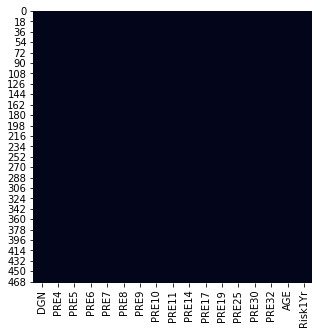

In [9]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (5, 5))
sns.heatmap(encoded_data.isnull(), cbar=False)



смотрим на признаки на гистограмме

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a5ca1a828>,
      dtype=object)

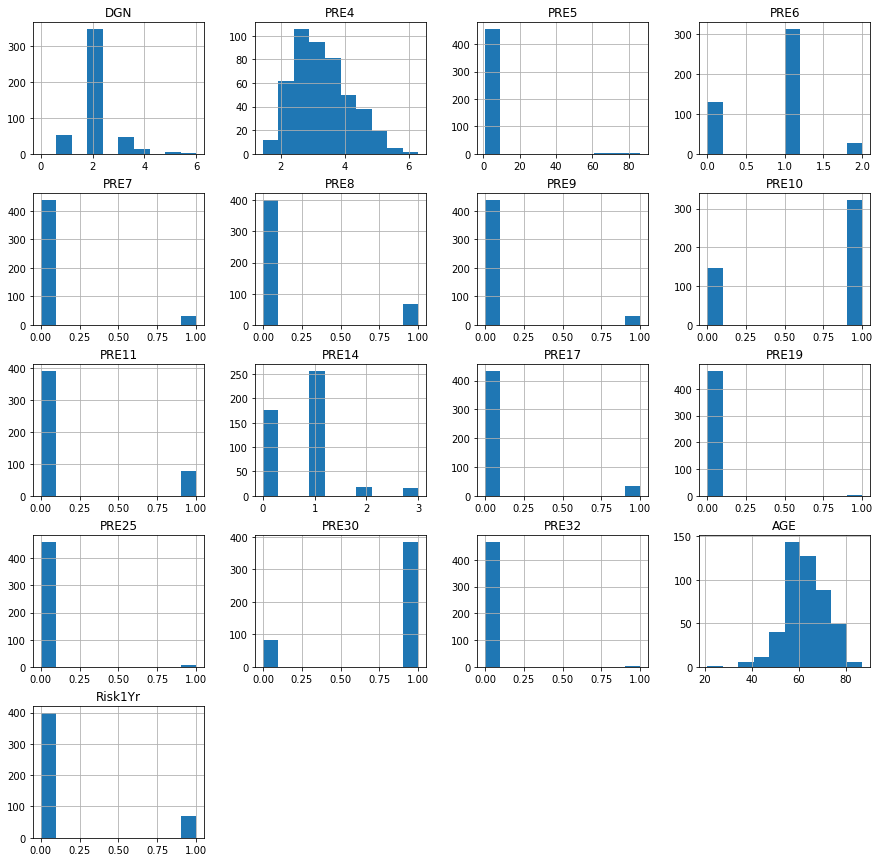

In [10]:
encoded_data.hist(figsize=(15, 15))



удаляем столбцы, в которых один из бинарных признаков значительн преобладает, второй встречается единично. Проверяла  - без удаления результат хуже.

In [11]:
encoded_data = encoded_data.drop(['PRE19', 'PRE25', 'PRE32'], axis=1)
encoded_data

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE30,AGE,Risk1Yr
0,1,2.88,2.16,1,0,0,0,1,1,3,0,1,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,1,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,1,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,1,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,1,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,1,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,1,79,0


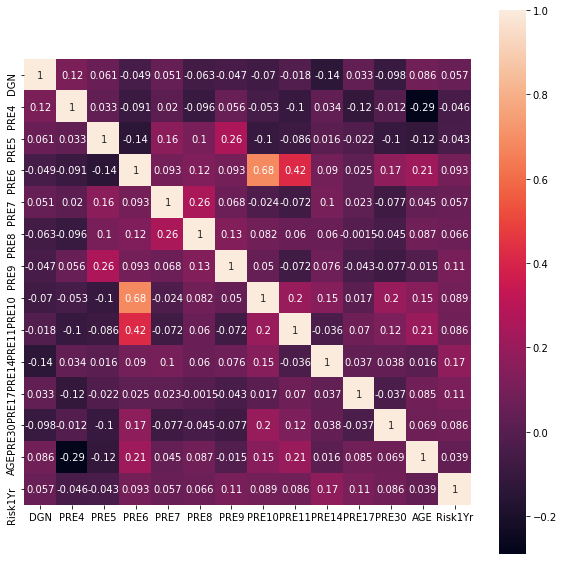

In [12]:
plt.subplots(figsize=(10, 10))
sns.heatmap(encoded_data.corr(), square=True, annot=True)
plt.show()

In [13]:
encoded_data.describe(percentiles=np.linspace(0, 1, 11))

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE30,AGE,Risk1Yr
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,2.091489,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,0.736170,0.074468,0.821277,62.534043,0.148936
std,0.695808,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.383529,8.706902,0.356405
min,0.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
0%,0.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
10%,1.000000,2.316000,1.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000
20%,2.000000,2.516000,1.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,55.800000,0.000000
30%,2.000000,2.720000,2.080000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,0.000000
40%,2.000000,2.932000,2.240000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,60.000000,0.000000
50%,2.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,62.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a5c8fb2b0>,
      dtype=object)

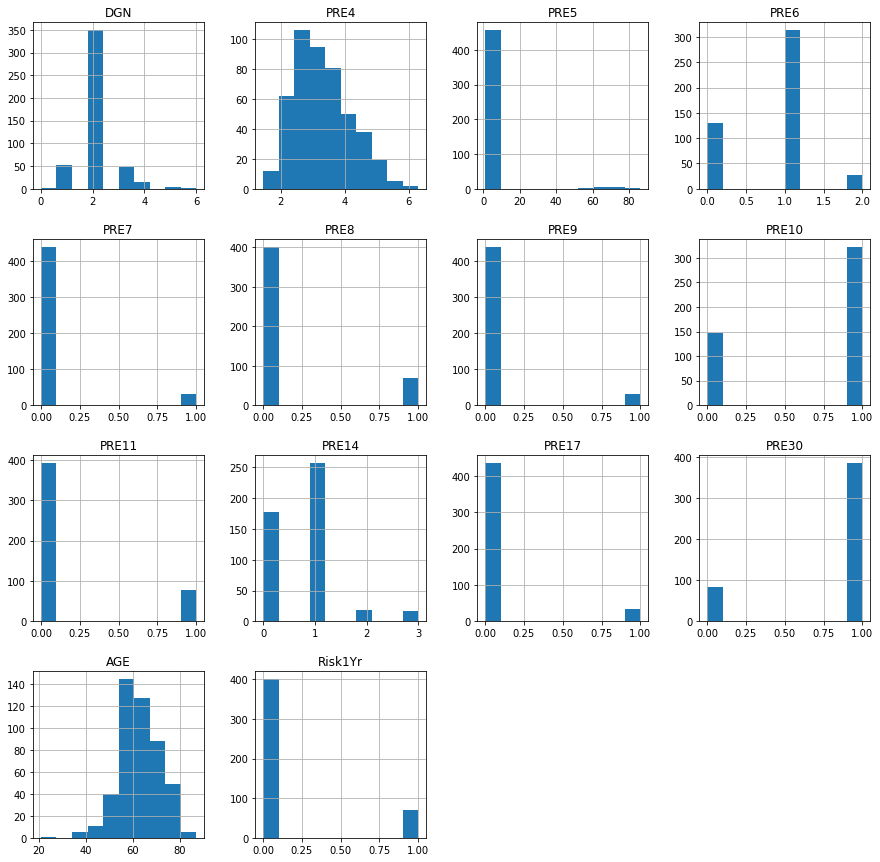

In [14]:
encoded_data.hist(figsize=(15, 15))



в столбце 'PRE5' среднее значение (с учётом выбросов) = 4,6, следовательно, удаляем строки, в которых значения данного признака превышают 10.

In [15]:
encoded_data[df['PRE5']> 10]

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE30,AGE,Risk1Yr
25,4,4.56,72.8,0,1,1,0,1,0,1,0,1,57,0
89,2,2.83,66.4,1,1,1,1,1,0,1,0,1,75,0
98,2,2.63,67.3,1,0,0,1,1,0,0,0,1,54,0
112,2,3.68,64.1,0,0,0,0,0,0,1,0,1,60,0
132,1,2.50,71.1,0,0,0,1,0,0,2,0,1,64,1
255,2,3.72,78.3,0,1,0,0,1,0,1,0,1,44,0
319,2,2.10,69.1,0,0,0,0,0,0,0,0,1,62,0
325,3,5.03,79.3,1,0,0,1,0,0,0,0,0,38,0
330,1,2.94,76.0,1,0,1,1,1,0,1,0,0,61,0
349,3,1.82,86.3,0,0,0,0,0,0,1,0,0,67,0


In [16]:
encoded_data = encoded_data.drop(np.where(encoded_data['PRE5'] > 10)[0])
encoded_data

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE30,AGE,Risk1Yr
0,1,2.88,2.16,1,0,0,0,1,1,3,0,1,60,0
1,2,3.40,1.88,0,0,0,0,0,0,1,0,1,51,0
2,2,2.76,2.08,1,0,0,0,1,0,0,0,1,59,0
3,2,3.68,3.04,0,0,0,0,0,0,0,0,0,54,0
4,2,2.44,0.96,2,0,1,0,1,1,0,0,1,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,3.88,2.12,1,0,0,0,1,0,2,0,1,63,0
466,2,3.76,3.12,0,0,0,0,0,0,0,0,1,61,0
467,2,3.04,2.08,1,0,0,0,1,0,2,0,0,52,0
468,2,1.96,1.68,1,0,0,0,1,1,1,0,1,79,0




Данный являются несбалансированными

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


F    400
T     70
Name: Risk1Yr, dtype: int64

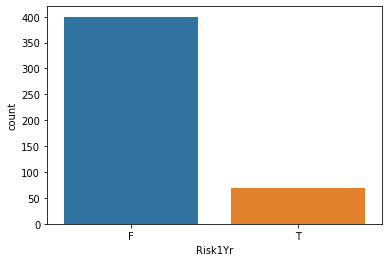

In [17]:
sns.countplot(df['Risk1Yr']);
df['Risk1Yr'].value_counts()

In [18]:
encoded_data.Risk1Yr.value_counts()

0    387
1     69
Name: Risk1Yr, dtype: int64


Разделим нашу выборку на test и train в соотношении 80 на 20 %

In [19]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop(['Risk1Yr'], axis=1)
y = encoded_data['Risk1Yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
len(y_test), len(y_train)

(92, 364)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import sklearn.metrics as metrics


Используем в логистической регрессии параметр для несбаланстрованных данных class_weight = 'balanced'

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.64      0.74        78
           1       0.18      0.43      0.25        14

    accuracy                           0.61        92
   macro avg       0.52      0.53      0.49        92
weighted avg       0.76      0.61      0.66        92




Использовать "деревья" на несбалансированных данных не имеет смысла

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {
    'max_depth': [i for i in range(13, 15)],
    'min_samples_split': [i for i in range(2, 10)],
    'max_features': [2, len(encoded_data)-1]
}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(RandomForestRegressor(), param_grid, verbose=2, n_jobs=-1)
gs.fit(X_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [ 0.00245641 -0.02281991 -0.0200001   0.01692279 -0.00302264  0.00059664
 -0.01487727 -0.00369088         nan         nan         nan         nan
         nan         nan         nan         nan -0.03082759 -0.0216203
 -0.00616464  0.00478653 -0.00187159 -0.01548582 -0.00176121 -0.00308211
         nan         nan         nan         nan         nan         nan
         nan         nan]
  category=UserWarning


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [13, 14], 'max_features': [2, 455],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=2)

In [25]:
# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
print()
gs.best_params_, gs.best_score_

({'max_depth': 13, 'max_features': 2, 'min_samples_split': 5},
 0.016922791313677556)

In [26]:
column_names = list(encoded_data.columns)
column_names

['DGN',
 'PRE4',
 'PRE5',
 'PRE6',
 'PRE7',
 'PRE8',
 'PRE9',
 'PRE10',
 'PRE11',
 'PRE14',
 'PRE17',
 'PRE30',
 'AGE',
 'Risk1Yr']

In [27]:
del column_names[-1]

In [28]:
column_names

['DGN',
 'PRE4',
 'PRE5',
 'PRE6',
 'PRE7',
 'PRE8',
 'PRE9',
 'PRE10',
 'PRE11',
 'PRE14',
 'PRE17',
 'PRE30',
 'AGE']

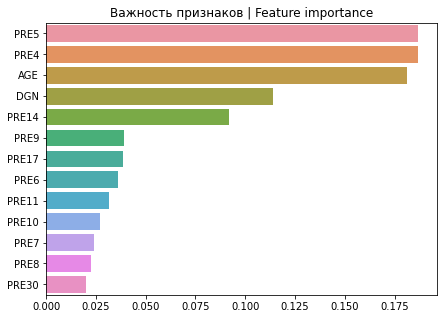

In [29]:
def plot_feature_importances(model, columns):
    # выбираем кол-во признаков для отображения
    nr_f = 15
    # берем данные для графика
    # берем алгоритм с лучшими параметрами
    # по х мы берем важность признаков исходя из критерия Джини, сортируем их вместе с названиями колонок по возрастанию
    imp = pd.Series(data = model.best_estimator_.feature_importances_, 
                    index=columns).sort_values(ascending=False)
    # построили фигуру
    plt.figure(figsize=(7,5))
    # отобразили название
    plt.title("Важность признаков | Feature importance")
    # построили 10 самых важных признаков
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')


# вызвали функцию отображения самых важных признаков
# тут columns - название всех колонок, типа encoded_df.columns
plot_feature_importances(gs, column_names)

Для дальнейше работы нормализуем, перемешаем, машатабируем и аугментируем данные

In [30]:
# нормализация
def normalize(encoded_data, df_type = 'train', mean = None, std = None):
    if df_type == 'train':
        X_train = encoded_data.drop(columns=['Risk1Yr']).values
        y_train = encoded_data['Risk1Yr'].values

        mean = X_train.mean(axis=0)
        std = X_train.std(axis=0)

        X_train = (X_train - mean)/std

        return X_train, y_train, mean, std
    else:
        X_train = encoded_data.drop(columns=['Risk1Yr']).values
        y_train = encoded_data['Risk1Yr'].values

        return (X_train - mean)/std, y_train, mean, std

In [31]:
train_size = 0.8

# перемешка
encoded_data = encoded_data.sample(frac=1).reset_index(drop=True)

X_train, y_train, mean, std = normalize(encoded_data[:int(train_size*len(encoded_data))])
X_test, y_test, mean, std = normalize(encoded_data[int(train_size*len(encoded_data)):], df_type = 'test', mean = mean, std = std)

In [32]:
X_train.shape, X_test.shape

((364, 13), (92, 13))

In [33]:
y_train.shape, y_test.shape

((364,), (92,))

In [34]:
X_train

array([[-0.12066272, -0.67027807, -0.41944724, ..., -0.28305246,
         0.45309824,  0.82940705],
       [-0.12066272, -0.85283896, -0.66123803, ...,  3.53291402,
         0.45309824,  1.06181981],
       [-0.12066272,  0.74456882,  0.6927904 , ..., -0.28305246,
        -2.2070269 ,  0.82940705],
       ...,
       [ 1.39386251,  0.03714537,  0.06413434, ..., -0.28305246,
         0.45309824,  0.48078792],
       [-0.12066272, -0.76155852, -0.61287987, ..., -0.28305246,
         0.45309824, -0.56506947],
       [-0.12066272,  0.61905821,  0.52353685, ..., -0.28305246,
         0.45309824,  0.01596241]])

In [35]:
from sklearn.preprocessing import PolynomialFeatures
def create_polinomial(X, degree = 2):
    return PolynomialFeatures(degree).fit_transform(X)

In [36]:
X_train = create_polinomial(X_train, 2)
X_test = create_polinomial(X_test, 2)

In [37]:
X_train.shape, X_test.shape

((364, 105), (92, 105))

In [38]:
def oversample_data(X, y):
    return ADASYN(sampling_strategy='minority').fit_resample(np.array(X), np.array(y))

In [39]:
def augment_data(X, y):
    try:
        X, y = oversample_data(X, y)
    except:
        pass
    return X, y

In [40]:
X_train, y_train = augment_data(X_train, y_train)

In [41]:
X_train.shape, y_train.shape

((364, 105), (364,))

In [44]:
from sklearn.svm import SVC

In [45]:
alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1, scoring = 'f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.21887955 0.12237096 0.         0.
 0.18924148 0.11008913 0.03636364 0.03333333 0.15335404 0.11008913
 0.05934066 0.06190476 0.1738961  0.11008913 0.05714286 0.07563025
 0.17310559 0.11008913 0.0552381  0.0824359 ]
  category=UserWarning


({'C': 0.5555555555555554, 'kernel': 'linear'}, 0.21887955182072827)

In [46]:
alg = SVC(C =  5.0, kernel = 'rbf')
alg.fit(X_train, y_train)
preds = alg.predict(X_test)

In [47]:
from sklearn import metrics

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        75
           1       0.00      0.00      0.00        17

    accuracy                           0.77        92
   macro avg       0.40      0.47      0.44        92
weighted avg       0.66      0.77      0.71        92



In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=20)
# Обучаем его
gs.fit(X_train, y_train)
# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 6}, 0.8600877192982456)

In [49]:
from sklearn import dummy

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=3) 
# тренируем для knn и для dummy
clf_knn = knn.fit(X_train, y_train)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass strategy=most_frequent as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [50]:

# получаем от них предикты
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [51]:
print ('knn =', metrics.accuracy_score(y_test, y_knn), 'mp =', metrics.accuracy_score(y_test, y_mp))

knn = 0.8043478260869565 mp = 0.8152173913043478


Для дальнейше работы нормализуем, перемешаем, машатабируем и аугментируем данные

In [52]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean

parameters_rfr = {'n_estimators': [100, 200, 300],
               'max_features': ['auto'],
               'max_depth': [10, 20],
               'min_samples_split': [2, 4],
               'min_samples_leaf': [2],
               'bootstrap': [True]}


RFR = RandomForestRegressor(random_state=2, criterion='mse')
rgr = GridSearchCV(RFR, parameters_rfr, cv = 5)
rgr.fit(X_train, y_train)

print("Best parameters set found on training dataset for RandomForestRegressor:")
print(rgr.best_params_)
print()
print('best RF scored on CV(Mean cross-validated score of the best_estimator): ', '%.2f' % rgr.best_score_)


ETR = ExtraTreesRegressor(random_state=2, criterion='mse')
etr = GridSearchCV(ETR, parameters_rfr, cv = 5)
etr.fit(X_train, y_train)
print("Best parameters set found on training dataset for ExtraTreesRegressor:")
print(etr.best_params_)
print()
print('best RF scored on CV(Mean cross-validated score of the best_estimator): ', '%.2f' % etr.best_score_)

Best parameters set found on training dataset for RandomForestRegressor:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

best RF scored on CV(Mean cross-validated score of the best_estimator):  -0.02
Best parameters set found on training dataset for ExtraTreesRegressor:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

best RF scored on CV(Mean cross-validated score of the best_estimator):  -0.02


Не смогла нарисовать... на той строчке, что ошибка поставила # (#fig = plot_decision_regions(X_train, y_train, clf = i, legend=2))

Plotting points for the whole dataset..


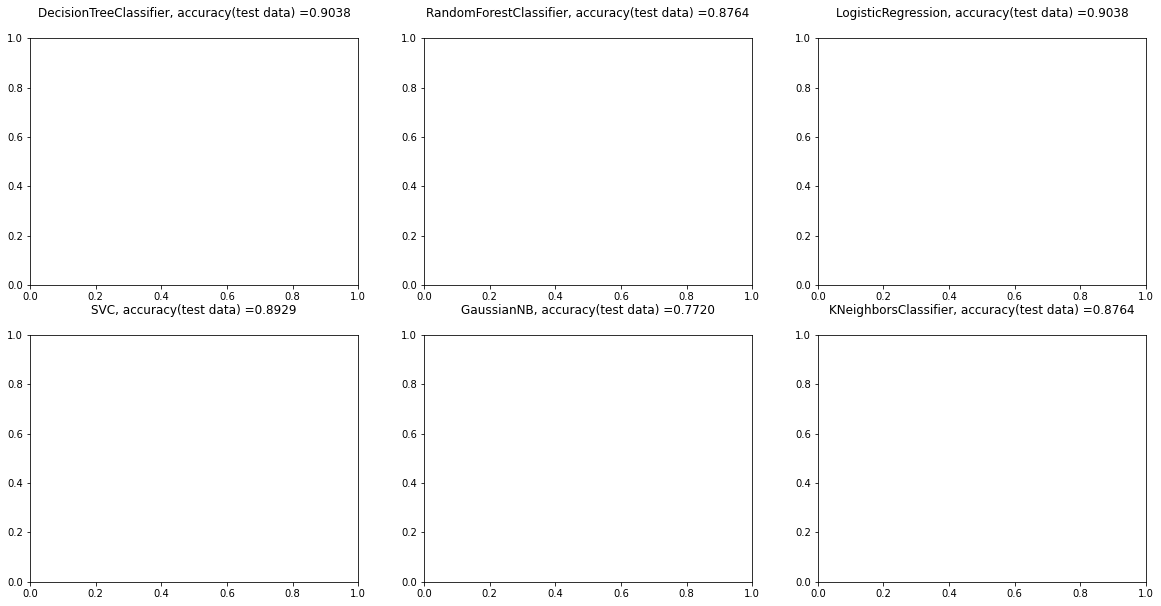

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from  sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

def train_classifier(models, classifiers, X, y, all_data = True):
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(ncols=3, nrows=2)
    for i,j,k in zip(models, classifiers, itertools.product([0,1],[0,1, 2])):
        clf = i
        clf.fit(X_train, y_train)
        
        ax = plt.subplot(gs[k[0], k[1]])            
        #fig = plot_decision_regions(X_train, y_train, clf = i, legend=2)
        plt.title(j +', accuracy(test data) =' + '%.4f'% clf.score(X, y)+'\n')

    plt.show()
    
    
#define models and their hyperparams
tree_clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)
forest_clf = RandomForestClassifier(n_estimators = 25, max_depth = 4, random_state = 42)
log_reg = LogisticRegression(random_state=42, penalty = 'l2',
                             multi_class = 'auto', solver = 'lbfgs', max_iter = 500)
svc = SVC(kernel='rbf', gamma='scale')
nb_gauss = GaussianNB()
knn = KNeighborsClassifier(n_neighbors = 3)

models = [tree_clf, forest_clf, log_reg, svc, nb_gauss, knn]
clfs = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression',
        'SVC', 'GaussianNB', 'KNeighborsClassifier']

print('Plotting points for the whole dataset..')
train_classifier(models, clfs, X_train, y_train)
